# Линейная регрессия

## Повестка дня¶
1. Знакомство с набором данных bikeshare
- Чтение в данных
- Визуализация данных
2. Основы линейной регрессии
- Форма линейной регрессии
- Построение модели линейной регрессии
- Использование модели для прогнозирования
- Имеет ли значение масштаб функций?
3. Работа с несколькими функциями
- Визуализация данных (часть 2)
- Добавление дополнительных функций в модель
4. Выбор между моделями
- Выбор функций
5. Метрики оценки для задач регрессии
- Сравнение моделей с разделением поездов/тестов и RMSE
- Сравнение тестирования RMSE с нулевым RMSE
6. Создание объектов
- Обработка категориальных характеристик
- Проектирование функций
- Сравнение линейной регрессии с другими моделями

## Чтение в данных¶
Мы будем работать с набором данных из Capital Bikeshare, который использовался в конкурсе Kaggle .([словарь данных](https://www.kaggle.com/c/bike-sharing-demand/data)).

Поля данных

datetime - почасовая дата + метка

времени сезона - 1 = весна, 2 = лето, 3 = осень, 4 = зимние

каникулы - считается ли день праздничным

рабочим днем - является ли день ни выходным, ни праздничной

погодой - 1: Ясно, Мало облаков, Переменная облачность, Переменная облачность

2: Туман + Облачно, Туман + Разорванные облака, Туман + Мало облаков, Туман

3: Легкий снег, Легкий дождь + Гроза + Рассеянные облака, Легкий дождь + Рассеянные облака

4: Сильный дождь + ледяные поддоны + Гроза + Туман, Снег + Туман

Температура - температура в градусах Цельсия atemp - «по ощущениям» температура в градусах Цельсия

влажность - относительная влажность

ветра - скорость ветра

случайный - количество инициированных

аренд незарегистрированных пользователей

registered - Количество зарегистрированных пользователей Количество инициированных

аренд - Количество общих аренд

In [1]:
import statsmodels.api as sm

In [2]:
# read the data and set the datetime as the index
import pandas as pd
url = 'https://raw.githubusercontent.com/trisha00001/file/main/bikeshare.csv'
bikes = pd.read_csv(url, index_col='datetime', parse_dates=True)

In [3]:
bikes.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
datetime,,,,,,,,,,,
2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


**Вопросы:**

- Что представляет собой каждое наблюдение?
- Что такое переменная ответа (как определено Kaggle)?
- Сколько существует функций?

In [4]:
bikes.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 10886 entries, 2011-01-01 00:00:00 to 2012-12-19 23:00:00
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      10886 non-null  int64  
 1   holiday     10886 non-null  int64  
 2   workingday  10886 non-null  int64  
 3   weather     10886 non-null  int64  
 4   temp        10886 non-null  float64
 5   atemp       10886 non-null  float64
 6   humidity    10886 non-null  int64  
 7   windspeed   10886 non-null  float64
 8   casual      10886 non-null  int64  
 9   registered  10886 non-null  int64  
 10  count       10886 non-null  int64  
dtypes: float64(3), int64(8)
memory usage: 1020.6 KB


In [5]:
# "count" is a method, so it's best to name that column something else
bikes.rename(columns={'count':'total'}, inplace=True)

In [6]:
bikes

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,total
datetime,,,,,,,,,,,
2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16
2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40
2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32
2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13
2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...
2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336
2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241
2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168


## Visualizing the data

In [7]:

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (8, 6)
plt.rcParams['font.size'] = 14

<Axes: xlabel='temp', ylabel='total'>

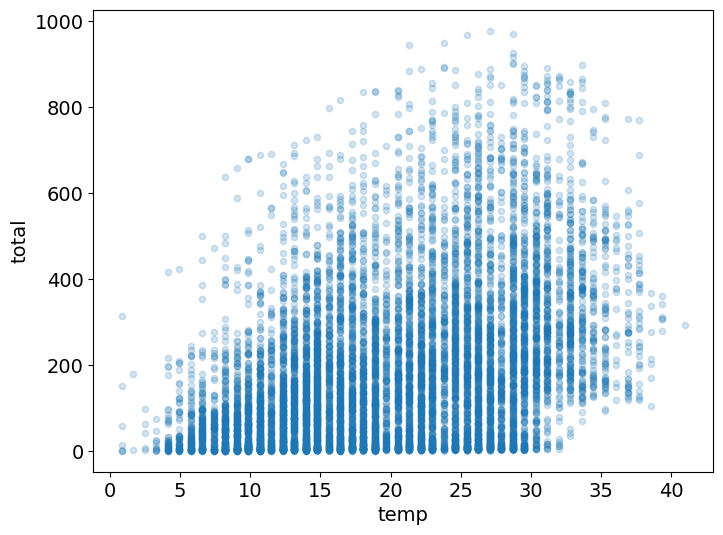

In [8]:
# Pandas scatter plot
bikes.plot(kind='scatter', x='temp', y='total', alpha=0.2)

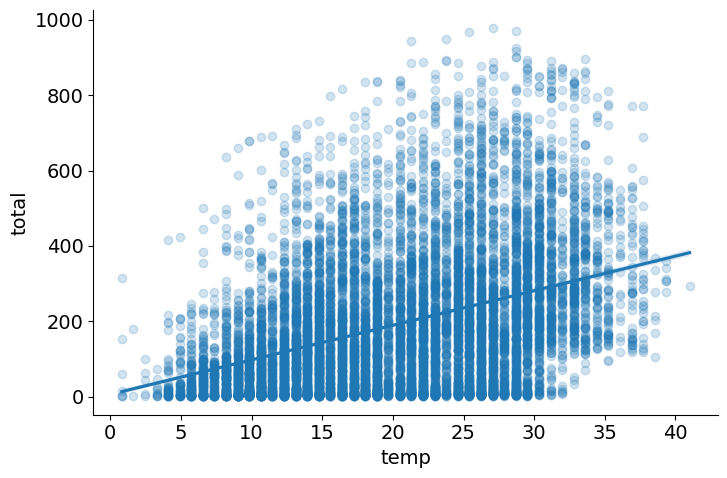

In [9]:
# Seaborn scatter plot with regression line
sns.lmplot(x='temp', y='total', data=bikes, aspect=1.5, scatter_kws={'alpha':0.2})

Рисунок 1 - Апроксимация лин. регрессий

## Form of linear regression

$y = \beta_0 + \beta_1x_1 + \beta_2x_2 + ... + \beta_nx_n$

- $y$ is the response
- $\beta_0$ is the intercept
- $\beta_1$ is the coefficient for $x_1$ (the first feature)
- $\beta_n$ is the coefficient for $x_n$ (the nth feature)

The $\beta$ values are called the **model coefficients**:

- These values are estimated (or "learned") during the model fitting process using the **least squares criterion**.
- Specifically, we are find the line (mathematically) which minimizes the **sum of squared residuals** (or "sum of squared errors").
- And once we've learned these coefficients, we can use the model to predict the response.

![Estimating coefficients](images/estimating_coefficients.png)

In the diagram above:

- The black dots are the **observed values** of x and y.
- The blue line is our **least squares line**.
- The red lines are the **residuals**, which are the vertical distances between the observed values and the least squares line.

## Building a linear regression model

In [10]:
# create X and y
feature_cols = ['temp']
X = bikes[feature_cols]
y = bikes.total

In [11]:

x=sm.add_constant(X)
# y=b0*1+b1x1
results=sm.OLS(y,x).fit()
#Contain Ordinary Least Square Regression
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  total   R-squared:                       0.156
Model:                            OLS   Adj. R-squared:                  0.156
Method:                 Least Squares   F-statistic:                     2006.
Date:                Thu, 03 Jul 2025   Prob (F-statistic):               0.00
Time:                        05:05:20   Log-Likelihood:                -71125.
No. Observations:               10886   AIC:                         1.423e+05
Df Residuals:                   10884   BIC:                         1.423e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.0462      4.439      1.362      0.173      -2.656      14.748
temp           9.1705      0.205     44.783      0.000       8.769       9.572
==============================================================================
Omnibus:                     1871.687   Durbin-Watson:                   0.369
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3221.966
Skew:                           1.123   Prob(JB):                         0.00
Kurtosis:                       4.434   Cond. No.                         60.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [12]:
# import, instantiate, fit
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()
linreg.fit(X, y)

LinearRegression()

In [13]:
# print the coefficients
print (linreg.intercept_)
print (linreg.coef_)

6.046212959616611
[9.17054048]


9,17*x +6.046

Interpreting the **intercept** ($\beta_0$):

- It is the value of $y$ when $x$=0.
- Thus, it is the estimated number of rentals when the temperature is 0 degrees Celsius.
- **Note:** It does not always make sense to interpret the intercept. (Why?)

Interpreting the **"temp" coefficient** ($\beta_1$):

- It is the change in $y$ divided by change in $x$, or the "slope".
- Thus, a temperature increase of 1 degree Celsius is **associated with** a rental increase of 9.17 bikes.
- This is not a statement of causation.
- $\beta_1$ would be **negative** if an increase in temperature was associated with a **decrease** in rentals.

## Using the model for prediction

How many bike rentals would we predict if the temperature was 25 degrees Celsius?

In [14]:
# manually calculate the prediction
linreg.intercept_ + linreg.coef_*25

array([235.309725])

In [15]:
# use the predict method
linreg.predict(np.array([25]).reshape(-1,1))

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([235.309725])

## Does the scale of the features matter?

Let's say that temperature was measured in Fahrenheit, rather than Celsius. How would that affect the model?

In [16]:
# create a new column for Fahrenheit temperature
bikes['temp_F'] = bikes.temp * 1.8 + 32
bikes.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,total,temp_F
datetime,,,,,,,,,,,,
2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,49.712
2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,48.236
2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,48.236
2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,49.712
2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,49.712


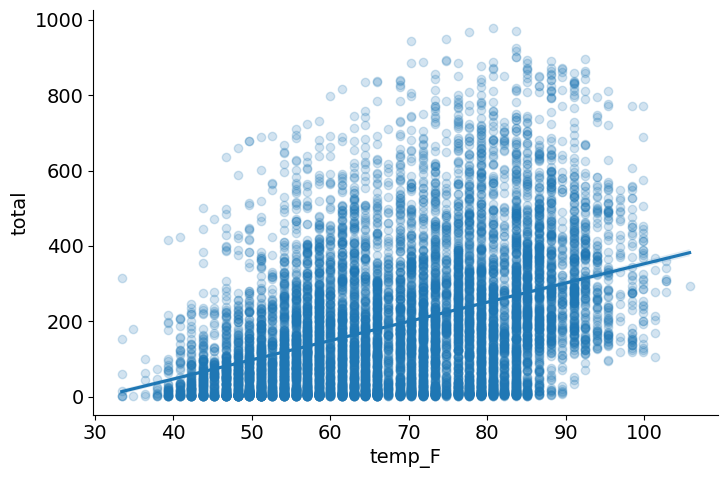

In [17]:
# Seaborn scatter plot with regression line
sns.lmplot(x='temp_F', y='total', data=bikes, aspect=1.5, scatter_kws={'alpha':0.2})


In [18]:
# create X and y
feature_cols = ['temp_F']
X = bikes[feature_cols]
y = bikes.total

# instantiate and fit
linreg = LinearRegression()
linreg.fit(X, y)

# print the coefficients
print( linreg.intercept_)
print (linreg.coef_)

-156.9856178212945
[5.09474471]


5* x-156

In [19]:
# convert 25 degrees Celsius to Fahrenheit
25 * 1.8 + 32

77.0

In [20]:
# manually calculate the prediction
linreg.intercept_ + linreg.coef_*77

array([235.309725])

In [21]:
# predict rentals for 77 degrees Fahrenheit
linreg.predict(np.array([77]).reshape(-1,1))

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([235.309725])

**Conclusion:** The scale of the features is **irrelevant** for linear regression models. When changing the scale, we simply change our **interpretation** of the coefficients.

In [22]:
# remove the temp_F column
bikes.drop('temp_F', axis=1, inplace=True)

## Visualizing the data (part 2)

In [23]:
# explore more features
feature_cols = ['temp', 'season', 'weather', 'humidity']

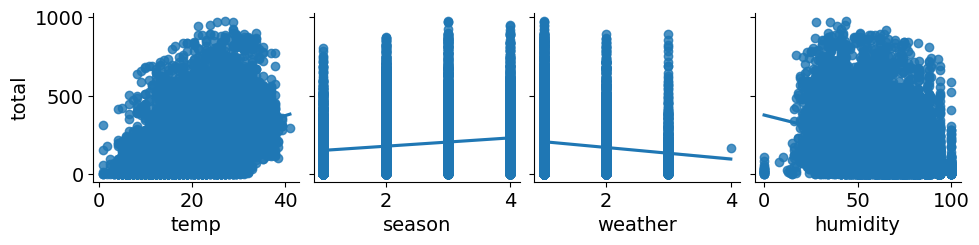

In [24]:
# multiple scatter plots in Seaborn
sns.pairplot(bikes, x_vars=feature_cols, y_vars='total', kind='reg')

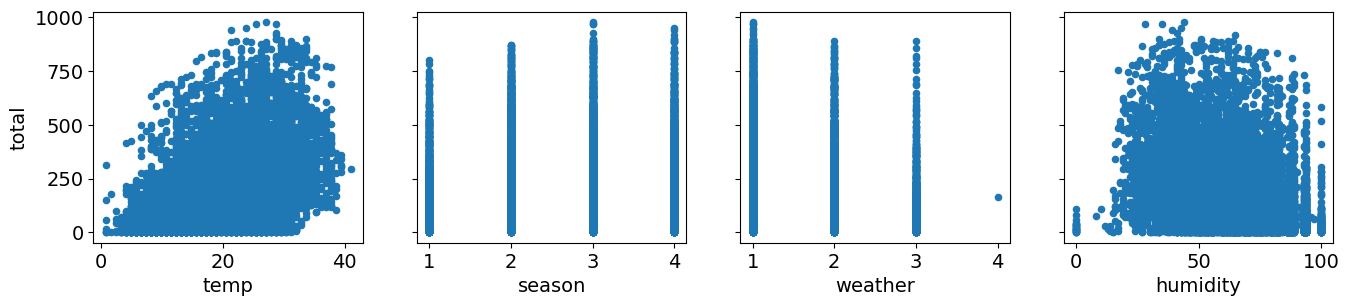

In [25]:
# multiple scatter plots in Pandas
fig, axs = plt.subplots(1, len(feature_cols), sharey=True)
for index, feature in enumerate(feature_cols):
    bikes.plot(kind='scatter', x=feature, y='total', ax=axs[index], figsize=(16, 3))

Are you seeing anything that you did not expect?

In [26]:
# cross-tabulation of season and month
pd.crosstab(bikes.season, bikes.index.month)

col_0,1,2,3,4,5,6,7,8,9,10,11,12
season,,,,,,,,,,,,
1,884,901,901,0,0,0,0,0,0,0,0,0
2,0,0,0,909,912,912,0,0,0,0,0,0
3,0,0,0,0,0,0,912,912,909,0,0,0
4,0,0,0,0,0,0,0,0,0,911,911,912


<Axes: title={'center': 'total'}, xlabel='season'>

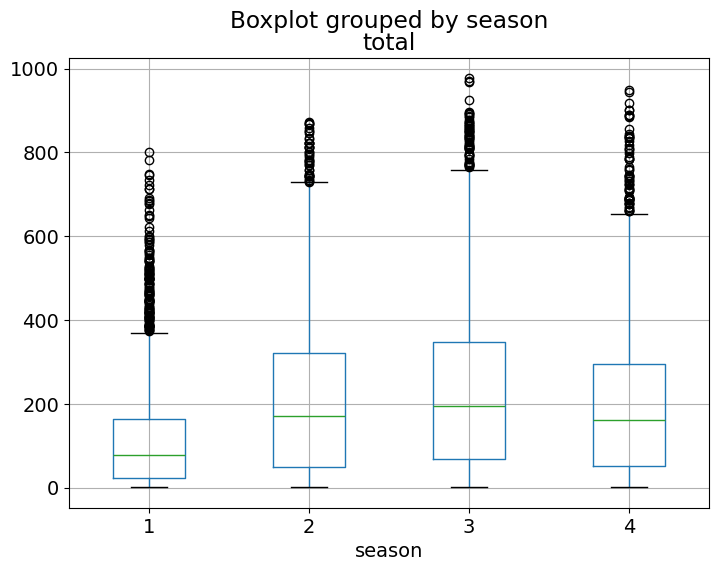

In [27]:
# box plot of rentals, grouped by season
bikes.boxplot(column='total', by='season')

Notably:

- A line can't capture a non-linear relationship.
- There are more rentals in winter than in spring (?)

<Axes: xlabel='datetime'>

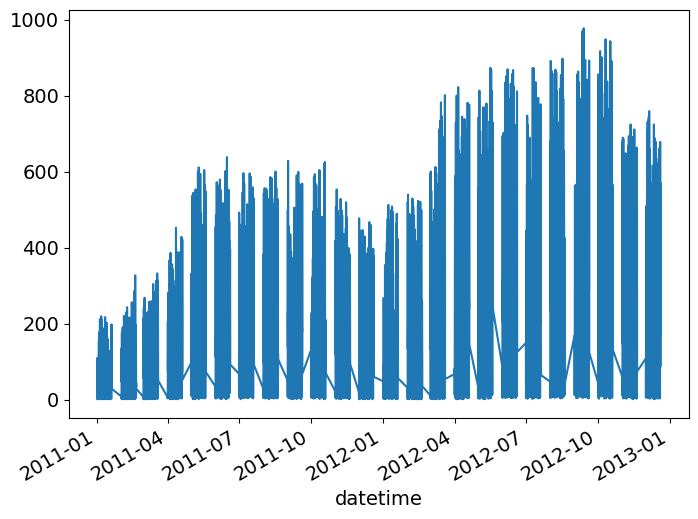

In [28]:
# line plot of rentals
bikes.total.plot()

What does this tell us?

There are more rentals in the winter than the spring, but only because the system is experiencing **overall growth** and the winter months happen to come after the spring months.

In [29]:
# correlation matrix (ranges from 1 to -1)
bikes.corr()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,total
season,1.000000,0.029368,-0.008126,0.008879,0.258689,0.264744,0.190610,-0.147121,0.096758,0.164011,0.163439
holiday,0.029368,1.000000,-0.250491,-0.007074,0.000295,-0.005215,0.001929,0.008409,0.043799,-0.020956,-0.005393
workingday,-0.008126,-0.250491,1.000000,0.033772,0.029966,0.024660,-0.010880,0.013373,-0.319111,0.119460,0.011594
weather,0.008879,-0.007074,0.033772,1.000000,-0.055035,-0.055376,0.406244,0.007261,-0.135918,-0.109340,-0.128655
temp,0.258689,0.000295,0.029966,-0.055035,1.000000,0.984948,-0.064949,-0.017852,0.467097,0.318571,0.394454
atemp,0.264744,-0.005215,0.024660,-0.055376,0.984948,1.000000,-0.043536,-0.057473,0.462067,0.314635,0.389784
humidity,0.190610,0.001929,-0.010880,0.406244,-0.064949,-0.043536,1.000000,-0.318607,-0.348187,-0.265458,-0.317371
windspeed,-0.147121,0.008409,0.013373,0.007261,-0.017852,-0.057473,-0.318607,1.000000,0.092276,0.091052,0.101369
casual,0.096758,0.043799,-0.319111,-0.135918,0.467097,0.462067,-0.348187,0.092276,1.000000,0.497250,0.690414
registered,0.164011,-0.020956,0.119460,-0.109340,0.318571,0.314635,-0.265458,0.091052,0.497250,1.000000,0.970948


<Axes: >

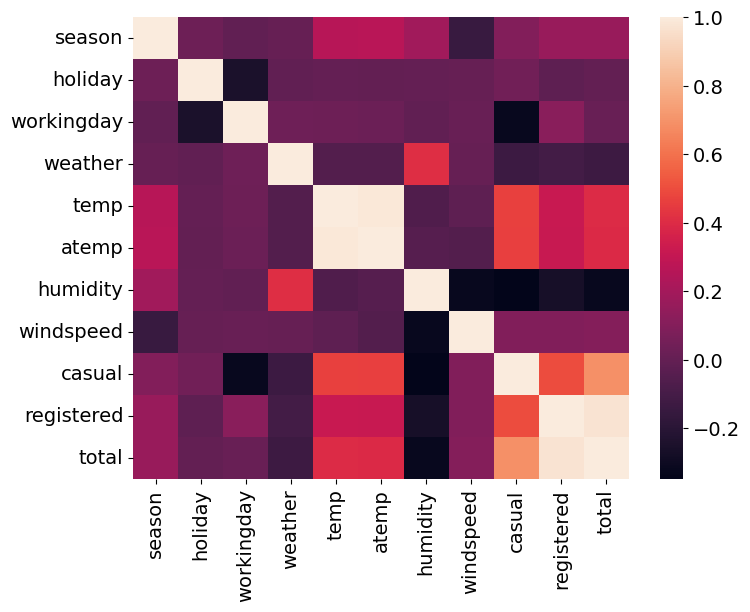

In [30]:
# visualize correlation matrix in Seaborn using a heatmap
sns.heatmap(bikes.corr())

What relationships do you notice?

## Adding more features to the model

In [31]:
# create a list of features
feature_cols = ['temp', 'season', 'weather', 'humidity']

In [32]:
# create X and y
X = bikes[feature_cols]
y = bikes.total

# instantiate and fit
linreg = LinearRegression()
linreg.fit(X, y)

# print the coefficients
print (linreg.intercept_)
print (linreg.coef_)

159.5206878612979
[ 7.86482499 22.53875753  6.67030204 -3.11887338]


In [33]:


x=sm.add_constant(X)
# y=b0*1+b1x1
results=sm.OLS(y,x).fit()
#Contain Ordinary Least Square Regression
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  total   R-squared:                       0.258
Model:                            OLS   Adj. R-squared:                  0.258
Method:                 Least Squares   F-statistic:                     947.3
Date:                Thu, 03 Jul 2025   Prob (F-statistic):               0.00
Time:                        05:06:24   Log-Likelihood:                -70419.
No. Observations:               10886   AIC:                         1.408e+05
Df Residuals:                   10881   BIC:                         1.409e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        159.5207      6.931     23.016      0.000     145.935     173.106
temp           7.8648      0.200     39.289      0.000       7.472       8.257
season        22.5388      1.424     15.828      0.000      19.748      25.330
weather        6.6703      2.590      2.575      0.010       1.594      11.747
humidity      -3.1189      0.087    -35.696      0.000      -3.290      -2.948
==============================================================================
Omnibus:                     2114.507   Durbin-Watson:                   0.430
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4037.932
Skew:                           1.193   Prob(JB):                         0.00
Kurtosis:                       4.790   Cond. No.                         316.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [34]:
feature_cols

['temp', 'season', 'weather', 'humidity']

In [35]:
# pair the feature names with the coefficients
dict(zip(feature_cols, linreg.coef_))

{'temp': np.float64(7.86482499247745),
 'season': np.float64(22.538757532466775),
 'weather': np.float64(6.670302035923732),
 'humidity': np.float64(-3.118873382396501)}

Interpreting the coefficients:

- Holding all other features fixed, a 1 unit increase in **temperature** is associated with a **rental increase of 7.86 bikes**.
- Holding all other features fixed, a 1 unit increase in **season** is associated with a **rental increase of 22.5 bikes**.
- Holding all other features fixed, a 1 unit increase in **weather** is associated with a **rental increase of 6.67 bikes**.
- Holding all other features fixed, a 1 unit increase in **humidity** is associated with a **rental decrease of 3.12 bikes**.

Does anything look incorrect?

## Feature selection

How do we choose which features to include in the model? We're going to use **train/test split** (and eventually **cross-validation**).

Why not use of **p-values** or **R-squared** for feature selection?

- Linear models rely upon **a lot of assumptions** (such as the features being independent), and if those assumptions are violated, p-values and R-squared are less reliable. Train/test split relies on fewer assumptions.
- Features that are unrelated to the response can still have **significant p-values**.
- Adding features to your model that are unrelated to the response will always **increase the R-squared value**, and adjusted R-squared does not sufficiently account for this.
- p-values and R-squared are **proxies** for our goal of generalization, whereas train/test split and cross-validation attempt to **directly estimate** how well the model will generalize to out-of-sample data.

More generally:

- There are different methodologies that can be used for solving any given data science problem, and this course follows a **machine learning methodology**.
- This course focuses on **general purpose approaches** that can be applied to any model, rather than model-specific approaches.

## Evaluation metrics for regression problems

Evaluation metrics for classification problems, such as **accuracy**, are not useful for regression problems. We need evaluation metrics designed for comparing **continuous values**.

Here are three common evaluation metrics for regression problems:

**Mean Absolute Error** (MAE) is the mean of the absolute value of the errors:

$$\frac 1n\sum_{i=1}^n|y_i-\hat{y}_i|$$

**Mean Squared Error** (MSE) is the mean of the squared errors:

$$\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2$$

**Root Mean Squared Error** (RMSE) is the square root of the mean of the squared errors:

$$\sqrt{\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2}$$

In [36]:
# example true and predicted response values
true = [100, 17, 5, 5]
pred = [8, 6, 5, 10]

In [37]:
((100-8)+(17-6)+(5-5)+(-1)*(5-10))/4

27.0

In [38]:
((100-8)**2+(17-6)**2+(5-5)**2+(5-10)**2)/4

2152.5

In [39]:
2152.5**0.5

46.39504283864818

In [40]:
# calculate these metrics by hand!
from sklearn import metrics
import numpy as np
print ('MAE:', metrics.mean_absolute_error(true, pred))
print ('MSE:', metrics.mean_squared_error(true, pred))
print ('RMSE:', np.sqrt(metrics.mean_squared_error(true, pred)))

MAE: 27.0
MSE: 2152.5
RMSE: 46.39504283864818


Comparing these metrics:

- **MAE** is the easiest to understand, because it's the average error.
- **MSE** is more popular than MAE, because MSE "punishes" larger errors, which tends to be useful in the real world.
- **RMSE** is even more popular than MSE, because RMSE is interpretable in the "y" units.

All of these are **loss functions**, because we want to minimize them.

Here's an additional example, to demonstrate how MSE/RMSE punish larger errors:

In [41]:
# same true values as above
true = [10, 7, 5, 5]

# new set of predicted values
pred = [10, 7, 5, 130]

# MAE is the same as before
print ('MAE:', metrics.mean_absolute_error(true, pred))

# MSE and RMSE are larger than before
print ('MSE:', metrics.mean_squared_error(true, pred))
print ('RMSE:', np.sqrt(metrics.mean_squared_error(true, pred)))

MAE: 31.25
MSE: 3906.25
RMSE: 62.5


## Comparing models with train/test split and RMSE

In [42]:
from sklearn.model_selection import train_test_split

# define a function that accepts a list of features and returns testing RMSE
def train_test_rmse(feature_cols):
    X = bikes[feature_cols]
    y = bikes.total
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=123)
    linreg = LinearRegression()
    linreg.fit(X_train, y_train)
    y_pred = linreg.predict(X_test)
    return np.sqrt(metrics.mean_squared_error(y_test, y_pred))

In [43]:
from sklearn.model_selection import train_test_split

# define a function that accepts a list of features and returns testing RMSE
def train_test_rmse(feature_cols):
    X = bikes[feature_cols]
    y = bikes.total
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=123)
    linreg = LinearRegression()
    linreg.fit(X_train, y_train)
    y_pred = linreg.predict(X_test)
    return np.sqrt(metrics.mean_squared_error(y_test, y_pred))

In [44]:
from sklearn.model_selection import train_test_split
a_train, a_test, b_train, b_test = train_test_split(X, y,
                                         test_size=0.33, random_state=42)

In [45]:
# compare different sets of features
print (train_test_rmse(['temp', 'season', 'weather', 'humidity']))
print( train_test_rmse(['temp', 'season', 'weather']))
print( train_test_rmse(['temp', 'season', 'humidity']))

155.64945913079674
164.1653997629182
155.59818936691417


In [46]:
feature_cols = ['temp', 'season', 'weather', 'humidity']
# create X and y
X = bikes[feature_cols]
y = bikes.total

x=sm.add_constant(X)
# y=b0*1+b1x1
results=sm.OLS(y,x).fit()
#Contain Ordinary Least Square Regression
results.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  total   R-squared:                       0.258
Model:                            OLS   Adj. R-squared:                  0.258
Method:                 Least Squares   F-statistic:                     947.3
Date:                Thu, 03 Jul 2025   Prob (F-statistic):               0.00
Time:                        05:06:58   Log-Likelihood:                -70419.
No. Observations:               10886   AIC:                         1.408e+05
Df Residuals:                   10881   BIC:                         1.409e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        159.5207      6.931     23.016      0.000     145.935     173.106
temp           7.8648      0.200     39.289      0.000       7.472       8.257
season        22.5388      1.424     15.828      0.000      19.748      25.330
weather        6.6703      2.590      2.575      0.010       1.594      11.747
humidity      -3.1189      0.087    -35.696      0.000      -3.290      -2.948
==============================================================================
Omnibus:                     2114.507   Durbin-Watson:                   0.430
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4037.932
Skew:                           1.193   Prob(JB):                         0.00
Kurtosis:                       4.790   Cond. No.                         316.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [47]:
feature_cols = ['temp', 'season', 'weather']
# create X and y
X = bikes[feature_cols]
y = bikes.total

x=sm.add_constant(X)
# y=b0*1+b1x1
results=sm.OLS(y,x).fit()
#Contain Ordinary Least Square Regression
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  total   R-squared:                       0.171
Model:                            OLS   Adj. R-squared:                  0.171
Method:                 Least Squares   F-statistic:                     750.6
Date:                Thu, 03 Jul 2025   Prob (F-statistic):               0.00
Time:                        05:07:01   Log-Likelihood:                -71022.
No. Observations:               10886   AIC:                         1.421e+05
Df Residuals:                   10882   BIC:                         1.421e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         33.4618      6.303      5.309      0.000      21.107      45.817
temp           8.6193      0.210     40.969      0.000       8.207       9.032
season        11.1167      1.466      7.581      0.000       8.242      13.991
weather      -31.1109      2.498    -12.453      0.000     -36.008     -26.214
==============================================================================
Omnibus:                     1805.229   Durbin-Watson:                   0.382
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3080.004
Skew:                           1.091   Prob(JB):                         0.00
Kurtosis:                       4.426   Cond. No.                         90.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [48]:
feature_cols = ['temp', 'season', 'humidity']
# create X and y
X = bikes[feature_cols]
y = bikes.total

x=sm.add_constant(X)
# y=b0*1+b1x1
results=sm.OLS(y,x).fit()
#Contain Ordinary Least Square Regression
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  total   R-squared:                       0.258
Model:                            OLS   Adj. R-squared:                  0.258
Method:                 Least Squares   F-statistic:                     1260.
Date:                Thu, 03 Jul 2025   Prob (F-statistic):               0.00
Time:                        05:07:04   Log-Likelihood:                -70422.
No. Observations:               10886   AIC:                         1.409e+05
Df Residuals:                   10882   BIC:                         1.409e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        164.0510      6.706     24.465      0.000     150.907     177.195
temp           7.8593      0.200     39.253      0.000       7.467       8.252
season        22.2801      1.421     15.682      0.000      19.495      25.065
humidity      -3.0269      0.080    -37.948      0.000      -3.183      -2.871
==============================================================================
Omnibus:                     2104.628   Durbin-Watson:                   0.428
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4001.336
Skew:                           1.191   Prob(JB):                         0.00
Kurtosis:                       4.775   Cond. No.                         304.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [49]:
# using these as features is not allowed!
print(train_test_rmse(['casual', 'registered']))

3.944943403449696e-14


In [50]:
feature_cols = ['casual', 'registered']
# create X and y
X = bikes[feature_cols]
y = bikes.total

x=sm.add_constant(X)
# y=b0*1+b1x1
results=sm.OLS(y,x).fit()
#Contain Ordinary Least Square Regression
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  total   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 4.085e+33
Date:                Thu, 03 Jul 2025   Prob (F-statistic):               0.00
Time:                        05:07:09   Log-Likelihood:             3.0238e+05
No. Observations:               10886   AIC:                        -6.048e+05
Df Residuals:                   10883   BIC:                        -6.047e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2.172e-14   2.92e-15      7.444      0.000     1.6e-14    2.74e-14
casual         1.0000   4.62e-17   2.16e+16      0.000       1.000       1.000
registered     1.0000   1.53e-17   6.54e+16      0.000       1.000       1.000
==============================================================================
Omnibus:                     4120.342   Durbin-Watson:                   0.105
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            15732.696
Skew:                           1.892   Prob(JB):                         0.00
Kurtosis:                       7.514   Cond. No.                         322.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Comparing testing RMSE with null RMSE

Null RMSE is the RMSE that could be achieved by **always predicting the mean response value**. It is a benchmark against which you may want to measure your regression model.

In [51]:
# split X and y into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=123)

# create a NumPy array with the same shape as y_test
y_null = np.zeros_like(y_test, dtype=float)

# fill the array with the mean value of y_test
y_null.fill(y_test.mean())
y_null

array([192.26451139, 192.26451139, 192.26451139, ..., 192.26451139,
       192.26451139, 192.26451139])

In [52]:
# compute null RMSE
np.sqrt(metrics.mean_squared_error(y_test, y_null))

np.float64(179.57906896465727)

## Handling categorical features

scikit-learn expects all features to be numeric. So how do we include a categorical feature in our model?

- **Ordered categories:** transform them to sensible numeric values (example: small=1, medium=2, large=3)
- **Unordered categories:** use dummy encoding (0/1)

What are the categorical features in our dataset?

- **Ordered categories:** weather (already encoded with sensible numeric values)
- **Unordered categories:** season (needs dummy encoding), holiday (already dummy encoded), workingday (already dummy encoded)

For season, we can't simply leave the encoding as 1 = spring, 2 = summer, 3 = fall, and 4 = winter, because that would imply an **ordered relationship**. Instead, we create **multiple dummy variables:**

In [53]:
# create dummy variables
season_dummies = pd.get_dummies(bikes.season, prefix='season')

# print 5 random rows
season_dummies.sample(n=5, random_state=1)

,season_1,season_2,season_3,season_4
datetime,,,,
2011-09-05 11:00:00,False,False,True,False
2012-03-18 04:00:00,True,False,False,False
2012-10-14 17:00:00,False,False,False,True
2011-04-04 15:00:00,False,True,False,False
2012-12-11 02:00:00,False,False,False,True


However, we actually only need **three dummy variables (not four)**, and thus we'll drop the first dummy variable.

Why? Because three dummies captures all of the "information" about the season feature, and implicitly defines spring (season 1) as the **baseline level:**

In [54]:
# drop the first column
season_dummies.drop(season_dummies.columns[0], axis=1, inplace=True)

# print 5 random rows
season_dummies.sample(n=5, random_state=1)

,season_2,season_3,season_4
datetime,,,
2011-09-05 11:00:00,False,True,False
2012-03-18 04:00:00,False,False,False
2012-10-14 17:00:00,False,False,True
2011-04-04 15:00:00,True,False,False
2012-12-11 02:00:00,False,False,True


In general, if you have a categorical feature with **k possible values**, you create **k-1 dummy variables**.

If that's confusing, think about why we only need one dummy variable for holiday, not two dummy variables (holiday_yes and holiday_no).

In [55]:
# concatenate the original DataFrame and the dummy DataFrame (axis=0 means rows, axis=1 means columns)
bikes = pd.concat([bikes, season_dummies], axis=1)

# print 5 random rows
bikes.sample(n=5, random_state=1)

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,total,season_2,season_3,season_4
datetime,,,,,,,,,,,,,,
2011-09-05 11:00:00,3,1,0,2,28.70,33.335,74,11.0014,101,207,308,False,True,False
2012-03-18 04:00:00,1,0,0,2,17.22,21.210,94,11.0014,6,8,14,False,False,False
2012-10-14 17:00:00,4,0,0,1,26.24,31.060,44,12.9980,193,346,539,False,False,True
2011-04-04 15:00:00,2,0,1,1,31.16,33.335,23,36.9974,47,96,143,True,False,False
2012-12-11 02:00:00,4,0,1,2,16.40,20.455,66,22.0028,0,1,1,False,False,True


In [56]:
# include dummy variables for season in the model
feature_cols = ['temp', 'season_2', 'season_3', 'season_4', 'humidity']
X = bikes[feature_cols]
y = bikes.total
linreg = LinearRegression()
linreg.fit(X, y)
list(zip(feature_cols, linreg.coef_))

[('temp', np.float64(11.18640586357579)),
 ('season_2', np.float64(-3.390543099718238)),
 ('season_3', np.float64(-41.736860713170714)),
 ('season_4', np.float64(64.4159614682421)),
 ('humidity', np.float64(-2.81948163625964))]

In [57]:
feature_cols = ['temp', 'season_2', 'season_3', 'season_4', 'humidity']
# create X and y
X = bikes[feature_cols]
y = bikes.total

x=sm.add_constant(X)
# y=b0*1+b1x1
results=sm.OLS(y,x).fit()
#Contain Ordinary Least Square Regression
results.summary()

ValueError: Pandas data cast to numpy dtype of object. Check input data with np.asarray(data).

How do we interpret the season coefficients? They are **measured against the baseline (spring)**:

- Holding all other features fixed, **summer** is associated with a **rental decrease of 3.39 bikes** compared to the spring.
- Holding all other features fixed, **fall** is associated with a **rental decrease of 41.7 bikes** compared to the spring.
- Holding all other features fixed, **winter** is associated with a **rental increase of 64.4 bikes** compared to the spring.

Would it matter if we changed which season was defined as the baseline?

- No, it would simply change our **interpretation** of the coefficients.

**Important:** Dummy encoding is relevant for all machine learning models, not just linear regression models.

In [58]:
# compare original season variable with dummy variables
print (train_test_rmse(['temp', 'season', 'humidity']))
print (train_test_rmse(['temp', 'season_2', 'season_3', 'season_4', 'humidity']))

155.59818936691417
154.33394593636


## Feature engineering

See if you can create the following features:

- **hour:** as a single numeric feature (0 through 23)
- **hour:** as a categorical feature (use 23 dummy variables)
- **daytime:** as a single categorical feature (daytime=1 from 7am to 8pm, and daytime=0 otherwise)

Then, try using each of the three features (on its own) with `train_test_rmse` to see which one performs the best!

In [59]:
# hour as a numeric feature
bikes['hour'] = bikes.index.hour

In [60]:
# hour as a categorical feature
hour_dummies = pd.get_dummies(bikes.hour, prefix='hour')
hour_dummies.drop(hour_dummies.columns[0], axis=1, inplace=True)
bikes = pd.concat([bikes, hour_dummies], axis=1)

In [61]:
bikes

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,...,hour_14,hour_15,hour_16,hour_17,hour_18,hour_19,hour_20,hour_21,hour_22,hour_23
datetime,,,,,,,,,,,,,,,,,,,,,
2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,...,False,False,False,False,False,False,False,False,False,False
2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,...,False,False,False,False,False,False,False,False,False,False
2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,...,False,False,False,False,False,False,False,False,False,False
2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,...,False,False,False,False,False,False,False,False,False,False
2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,...,False,False,False,False,False,True,False,False,False,False
2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,...,False,False,False,False,False,False,True,False,False,False
2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,...,False,False,False,False,False,False,False,True,False,False


In [62]:
# daytime as a categorical feature
bikes['daytime'] = ((bikes.hour > 6) & (bikes.hour < 21)).astype(int)

In [63]:
print (train_test_rmse(['hour']))
print (train_test_rmse(bikes.columns[bikes.columns.str.startswith('hour_')]))
print (train_test_rmse(['daytime']))

165.67174264111398
128.3112050281119
144.89116360237938


## Comparing linear regression with other models

Advantages of linear regression:

- Simple to explain
- Highly interpretable
- Model training and prediction are fast
- No tuning is required (excluding regularization)
- Features don't need scaling
- Can perform well with a small number of observations
- Well-understood

Disadvantages of linear regression:

- Presumes a linear relationship between the features and the response
- Performance is (generally) not competitive with the best supervised learning methods due to high bias
- Can't automatically learn feature interactions